# Analysing The World Happiness Report with PivotTables

In this project, we will use the built-in pandas function 'pivot_table' to analyse data in the World Happiness Report, which is a survey about the state of global happiness. The report ranks more than 150 countries by their happiness levels, and has been published almost every year since 2012. We'll use data collected in the years 2015, 2016, and 2017.

We can answer some interesting questions:

- Which are the happiest and least happy countries and regions in the world?
- Is happiness affected by region?
- Did the happiness score change significantly over the past three years?

In [2]:
import pandas as pd
import numpy as np

# reading the data
data = pd.read_csv(r'C:\projectdatasets\world_happiness_report.csv', index_col=0)

# diplay first 5 rows
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [3]:
# sort the data by ascending years and descending happiness scores
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)

# diplay the first 10 rows
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


Each country's 'Happiness Score' is calculated by summing the seven other variables in the table. These variables are population-weighted average scores on a 0-10 scale. These variables are:

- Economy: real GDP per capita
- Family: social support
- Health: healthy life expectancy
- Freedom: freedom to make life choices
- Trust: perceptions of corruption
- Generosity: perceptions of generosity
- Dystopia: each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

Each country's Happiness Score determines its 'Happiness Rank' - which is its relative position among other countries in that year e.g. the first row indicates that Switzerland was ranked the happiest country in 2015 with a happiness score of 7.587. Switzerland was ranked first just before Iceland, which scored 7.561. We can see that Western Europe took seven of the top eight rankings in 2015.

We will concentrate on the final Happiness Score to demonstrate the technical aspects of pivot table.

In [4]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))

Our data has 495 rows and 12 columns


In [5]:
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))

Are there missing values? True


In [10]:
# run basic statistics on the data
data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


We can see the Happiness Rank ranges from 1 to 158, which means that the largest number of surveyed countries for a given year was 158. Also, Happiness Rank was originally of type 'int'. The fact it's displayed as a float here implies we have NaN values in this column (we can also determine this by the count row which only amounts to 470 as opposed to the 495 rows in our data set).

The Year column doesn't have any missing values, because the count for Year amounts to 495 which is the number of rows in our data set. By comparing the count value for Year to the other columns, it seems we can expect 25 missing values in each column (495 in Year VS. 470 in all other columns).

## Categorising by Year and Region

With 'pivot_table', we can get another point of view on your data with only one line of code. Most of the pivot_table parameters use default values, so the only mandatory parameters we should add are 'data' and 'index'.

- data is the DataFrame to use
- index is the column, grouper, or array to group your data by
- values (optional) is the column you'd like to aggregate. If you don't specify, the function will aggregate all numeric columns.

We will look at the output, and then explain how the table was produced:

In [11]:
pd.pivot_table(data, index= 'Year', values= "Happiness Score")

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


By passing Year as the index parameter, we group our data by Year. The output is a pivot table that displays the three different values for Year as index, and the Happiness Score as values. The aggregation default value is mean (or average), so the values displayed are the yearly average for all countries. The table shows the average for all countries was highest in 2016, and is currently the lowest in the past three years.

Next, we will use the Region column as index:

In [12]:
pd.pivot_table(data, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


The numbers displayed above are the mean, but each region's mean for all years documented (2015, 2016, 2017). This display makes it easier to see Australia and New Zealand have the highest average score, while North America is ranked close behind. 

Despite the initial impressionfrom reading the data, which showed Western Europe in most of the top places, Western Europe is actually ranked third when calculating the average for the past three years. The lowest ranked region is Sub-Saharan Africa, and close behind is Southern Asia.

## Creating a Multi-Index Pivot Table

To group the data by more than one column, pass in a list of column names. We will categorise the data by Region and Year.

In [13]:
pd.pivot_table(data, index = ['Region', 'Year'], values="Happiness Score")

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

We can also use the 'columns' parameter to get a better display, which is the column, grouper or array you'd like to group your data by. Using it will spread the different values horizontally.

Using 'Year' as the Columns argument will display the different values for each year, making for a much better display:

In [14]:
pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


## Visualising The Pivot Table

We can add 'plot()' at the end of the 'pivot_table' to visualise the display

Text(0,0.5,'Happiness Rank')

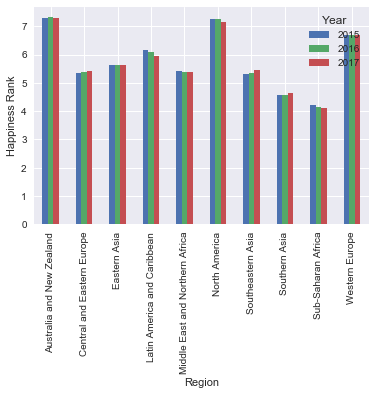

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# use Seaborn styles
sns.set()  

pd.pivot_table(data, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

## Manipulating The Data using 'aggfunc'

The 'aggfunc' parameter accepts a function, or list of functions, to use on your group (default: numpy.mean). If a list of functions is passed, the resulting pivot table will havecolumns whose top level are the function names

We will add median, minimum, maximum, and standard deviation for each region. This can help us evaluate how accurate the average is, and if it's really representative of the real picture

In [16]:
pd.pivot_table(data, index= 'Region', values= "Happiness Score",
               aggfunc= [np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


Looks like some regions have extreme values that might affect our average e.g. Middle East and Northern Africa region have a high standard deviation, so we might want to remove extreme values

## Applying a Custom Function to Remove Outliers

We can pass our own custom aggregation functions as arguments. We can use a lambda function, or create a function. 

We will calculate the average number of countries in each region, in a given year, using the lambda function:

In [21]:
pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, min, max, np.std, lambda x: x.count()/3])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.284,7.334,0.020936,2.000000
Central and Eastern Europe,5.371184,4.096,6.609,0.578274,29.000000
Eastern Asia,5.632333,4.874,6.422,0.502100,6.000000
Latin America and Caribbean,6.069074,3.603,7.226,0.728157,22.666667
Middle East and Northern Africa,5.387879,3.006,7.278,1.031656,19.333333
North America,7.227167,6.993,7.427,0.179331,2.000000
Southeastern Asia,5.364077,3.819,6.798,0.882637,8.666667
Southern Asia,4.590857,3.360,5.269,0.535978,7.000000


Both highest ranking regions with the lowest standard deviation only account for only two countries. Sub-Saharan Africa, on the other hand, has the lowest Happiness score, but it accounts for 43 countries. 

An interesting next step would be to remove extreme values from the calculation to see if the ranking changes significantly. We will create a function that only calculates the values between the 0.25th and 0.75th quantiles. We will use this function as a way to calculate the average for each region, and check if the ranking stays the same or not.

In [22]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


Removing the outliers mostly affected the regions with a higher number of countries, which makes sense. We can see Western Europe (average of 21 countries surveyed per year) improved its ranking. Unfortunately, Sub-Saharan Africa (average of 39 countries surveyed per year) received an even lower ranking when we removed the outliers.

## Categorising using String Manipulation

Up until now, we've grouped our data according to the categories in the original table. However, we can search the strings in the categories to create our own groups e.g. it would be interesting to look at the results by continents. We can do this by looking for region names that contains Asia, Europe, etc. 

To do this, we first assign our pivot table to a variable, and then add our filter:

In [23]:
table = pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers])

In [25]:
table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [26]:
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


The difference shows that the two European regions have a larger difference in happiness score. In most cases, removing outliers makes the score higher, but not in Eastern Asia.

To extract specific values from more than one column, it's better to use 'df.query' because the previous method won't work for conditioning multi-indexes e.g. we can choose to view specific years, and specific regions in the Africa area:

In [27]:
table = pd.pivot_table(data, index = ['Region', 'Year'], values='Happiness Score',
               aggfunc= [np.mean, remove_outliers])

In [28]:
table

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Australia and New Zealand       2015        7.285000        7.285000
                                2016        7.323500        7.323500
                                2017        7.299000        7.299000
Central and Eastern Europe      2015        5.332931        5.386000
                                2016        5.370690        5.479000
                                2017        5.409931        5.506500
Eastern Asia                    2015        5.626167        5.604875
                                2016        5.624167        5.598875
                                2017        5.646667        5.611125
Latin America and Caribbean     2015        6.144682        6.243250
                                2016        6.101750        6.232500
                                2017        5.957818        6.001250
Middle East and Northern Africa 2015        5.406900        5.515875
                                2016        5.386053        5.540250
                                2017        5.369684        5.425500
North America                   2015        7.273000        7.273000
                                2016        7.254000        7.254000
                                2017        7.154500        7.154500
Southeastern Asia               2015        5.317444        5.323000
                                2016        5.338889        5.440500
                                2017        5.444875        5.555375
Southern Asia                   2015        4.580857        4.668250
                                2016        4.563286        4.686000
                                2017        4.628429        4.682000
Sub-Saharan Africa              2015        4.202800        4.168375
                                2016        4.136421        4.089125
                                2017        4.111949        4.118000
Western Europe                  2015        6.689619        6.840000
                                2016        6.685667        6.850000
                                2017        6.703714        6.890000

In [29]:
table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

## Handling Missing Data

There are other 'pivot_table' parameters you can use relating to missing values:

- 'dropna' is type boolean, to indicate you don't want to include columns whose entries are all NaN (default: True)
- 'fill_value' is type scalar, used to choose a value to replace missing values (default: None).

We don't have any columns where all entries are NaN, but if we did, 'pivot_table' would drop them by default according to 'dropna' definition.

We have been letting 'pivot_table' treat our NaN's according to the default settings. The 'fill_value' default value is None; this means we didn't replace missing values in our dataset. To demonstrate this we'll need to produce a pivot table with NaN values. We can split the Happiness Score of each region into three quantiles, and check how many countries fall into each of the three quantiles (hoping at least one of the quantiles will have missing values in it).

To do this, we will use 'qcut()', which is a built-in pandas function that allows you to split your data into any number of quantiles you choose e.g. specifying pd.qcut(data["Happiness Score"], 4) will result in four quantiles:

- 0-25%
- 25%-50%
- 50%-75%
- 75%-100%

In [34]:
# splitting the happiness score into 3 quantiles
score = pd.qcut(data["Happiness Score"], 4)
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count').head(9)

Happiness Score
Region                      Happiness Score                 
Australia and New Zealand   (2.692, 4.509]                 6
Central and Eastern Europe  (6.234, 7.587]                10
                            (5.283, 6.234]                28
                            (4.509, 5.283]                46
                            (2.692, 4.509]                 3
Eastern Asia                (5.283, 6.234]                 6
                            (4.509, 5.283]                 9
                            (2.692, 4.509]                 3
Latin America and Caribbean (6.234, 7.587]                 2

## Adding Total Rows/Columns

The last two parameters are both optional, used to improve display:

- 'margins' is type boolean and allows you to add subtotal / grand totals (Default False)
- 'margins_name' is a string, and accepts the the row/column that contains the totals when margins is True (default ‘All’)

In [35]:
# splitting the happiness score into 3 quantiles
score = pd.qcut(data['Happiness Score'], 3)

# creating a pivot table and only displaying the first 9 values 
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count', fill_value= 0,
              margins = True, margins_name= 'Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                  6
Central and Eastern Europe      (5.895, 7.587]                15
                                (4.79, 5.895]                 58
                                (2.692, 4.79]                 14
Eastern Asia                    (4.79, 5.895]                 11
                                (2.692, 4.79]                  7
Latin America and Caribbean     (5.895, 7.587]                 4
                                (4.79, 5.895]                 19
                                (2.692, 4.79]                 45
Middle East and Northern Africa (5.895, 7.587]                18
                                (4.79, 5.895]                 20
                                (2.692, 4.79]                 20
North America                   (2.692, 4.79]                  6
Southeastern Asia               (5.895, 7.587]                 6
                                (4.79, 5.895]                 12
                                (2.692, 4.79]                  8
Southern Asia                   (5.895, 7.587]                13
                                (4.79, 5.895]                  8
Sub-Saharan Africa              (5.895, 7.587]               101
                                (4.79, 5.895]                 16
Western Europe                  (4.79, 5.895]                 12
                                (2.692, 4.79]                 51
Total count                                                  470